<a href="https://colab.research.google.com/github/sapatel97/SP500_FedRes_Sentiment/blob/master/price_history_tdameritrade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Exercise Nicholas Renotte - Reinforcement Learning Hive
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

     |████████████████████████████████| 411.5MB 46kB/s 
     |████████████████████████████████| 412.3MB 47kB/s 
     |████████████████████████████████| 245kB 49.2MB/s 
     |████████████████████████████████| 174kB 39.5MB/s 
     |████████████████████████████████| 3.8MB 32.6MB/s 
     |████████████████████████████████| 512kB 55.9MB/s 
     |████████████████████████████████| 51kB 3.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=52605a495be3e778d2948785e22d946780a436ee98b495b4a3da17b01216b5a4
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorfl

In [26]:
import gym
import gym_anytrading

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C


import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [61]:
df = pd.read_csv('/content/gdrive/My Drive/HVBTF.csv')

In [99]:
print(df.head()) #looking into dataset
print(len(df))

        Date  Open  High   Low  Close  Adj Close  Volume
0 2020-04-03  0.14  0.16  0.13   0.14       0.14  612000
1 2020-04-06  0.15  0.17  0.15   0.17       0.17  850100
2 2020-04-07  0.16  0.19  0.16   0.17       0.17  749000
3 2020-04-08  0.18  0.18  0.16   0.17       0.17  476600
4 2020-04-09  0.17  0.18  0.16   0.17       0.17  917500
251


In [63]:
df.dtypes #date is an object, need to change to date

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [64]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [74]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5) #5 sets of signal features trading bot would have

In [75]:
env.prices #prices
env.signal_features #differences


array([[ 0.14,  0.  ],
       [ 0.17,  0.03],
       [ 0.17,  0.  ],
       [ 0.17,  0.  ],
       [ 0.17,  0.  ],
       [ 0.15, -0.02],
       [ 0.16,  0.01],
       [ 0.16,  0.  ],
       [ 0.16,  0.  ],
       [ 0.17,  0.01],
       [ 0.18,  0.01],
       [ 0.18,  0.  ],
       [ 0.19,  0.01],
       [ 0.22,  0.03],
       [ 0.23,  0.01],
       [ 0.24,  0.01],
       [ 0.24,  0.  ],
       [ 0.29,  0.05],
       [ 0.28, -0.01],
       [ 0.26, -0.02],
       [ 0.25, -0.01],
       [ 0.25,  0.  ],
       [ 0.27,  0.02],
       [ 0.31,  0.04],
       [ 0.33,  0.02],
       [ 0.28, -0.05],
       [ 0.3 ,  0.02],
       [ 0.3 ,  0.  ],
       [ 0.3 ,  0.  ],
       [ 0.27, -0.03],
       [ 0.27,  0.  ],
       [ 0.28,  0.01],
       [ 0.28,  0.  ],
       [ 0.26, -0.02],
       [ 0.26,  0.  ],
       [ 0.25, -0.01],
       [ 0.26,  0.01],
       [ 0.27,  0.01],
       [ 0.27,  0.  ],
       [ 0.28,  0.01],
       [ 0.3 ,  0.02],
       [ 0.3 ,  0.  ],
       [ 0.3 ,  0.  ],
       [ 0.

info {'total_reward': 0.2699999999999999, 'total_profit': 1.6096235164947867, 'position': 1}


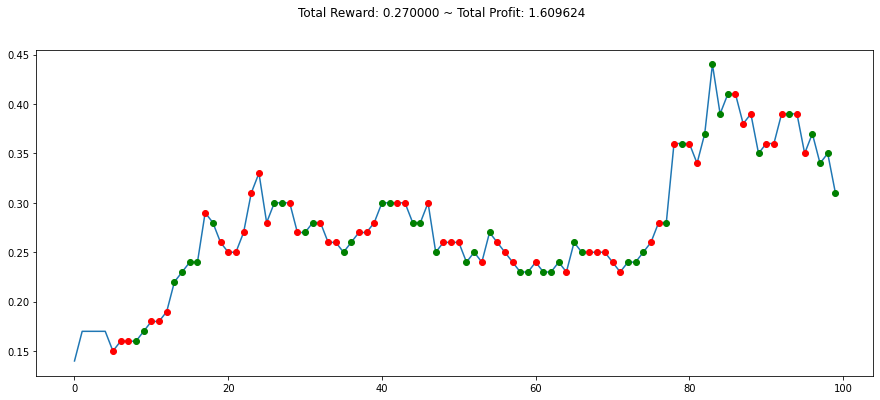

In [76]:
#building envir.

state = env.reset()
while True:
  action = env.action_space.sample()
  n_state, reward, done, info = env.step(action)
  if done:
    print("info",info)
    break
  
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()
#total profit: 60%

In [80]:
#build envir and train
env_maker = lambda: gym.make('stocks-v0',df=df,frame_bound=(5,100),window_size=5)
env = DummyVecEnv([env_maker])

In [82]:
#deep neural network that has lstm layer = allows NN to keep context and previous windows. 
model = A2C('MlpLstmPolicy',env, verbose =1) #training algo
model.learn(total_timesteps=10000)

----------------------------------
| explained_variance | -6.59e+03 |
| fps                | 17        |
| nupdates           | 1         |
| policy_entropy     | 0.693     |
| total_timesteps    | 5         |
| value_loss         | 2.14e-06  |
----------------------------------
---------------------------------
| explained_variance | -0.00688 |
| fps                | 335      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 0.000298 |
---------------------------------
---------------------------------
| explained_variance | 0.0892   |
| fps                | 365      |
| nupdates           | 200      |
| policy_entropy     | 0.693    |
| total_timesteps    | 1000     |
| value_loss         | 0.000823 |
---------------------------------
----------------------------------
| explained_variance | -1.26e+03 |
| fps                | 381       |
| nupdates           | 300       |
| policy_entropy     | 0.693     |
|

KeyboardInterrupt: ignored

In [96]:
env = gym.make('stocks-v0',df=df, frame_bound=(100,200),window_size=5)
obs = env.reset()
while True:
  obs = obs[np.newaxis, ...]
  action, _states = model.predict(obs)
  obs,rewards,done,info = env.step(action)
  if done:
    print("info",info)
    break

#tech. ~80 percent profit from day 100-200

info {'total_reward': 1.3600000000000003, 'total_profit': 1.7958880517754865, 'position': 1}


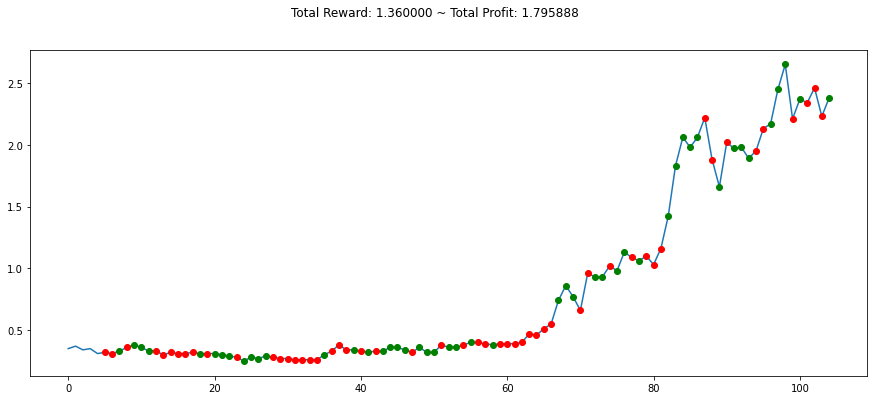

In [100]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()